Import

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

Load Data

In [2]:

from sklearn.preprocessing import StandardScaler
data = pd.read_csv('./Data/featuresfloatvf.csv')
data =data.drop('Unnamed: 0', axis=1)
# x=data.loc[:,['statuses' , 'date_joined' , 'most_recent_post' , 'following' , 'followers' , 'likes', 'retweet' , 'retweeted_count'  ,'avg_tweets_by_hour_of_day', 'avg_tweets_by_day_of_week']]
x=data.iloc[:, :-1]
y = data.account_type.values.tolist()

In [3]:





x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=48)

Train the Gradient Boosting model

In [4]:
pipe = Pipeline([('gradientBoost', GradientBoostingClassifier())])
pipe.fit(x_train,y_train)

y_pred_train = pipe.predict(x_train)
y_pred_test = pipe.predict(x_test)



Training Accuracy score: 0.8685795454545454
Testing Accuracy score: 0.8634090909090909


Calculate the accuracy of the model

In [5]:
def accurracy(y_true,y_pred_test):
    return np.sum(y_true==y_pred_test)/len(y_true)
print('Accuracy  classification :',accurracy(y_test,y_pred_test))


Accuracy  classification : 0.8795711558231752


Calculate the classification report of the model

classification_report 
               precision    recall  f1-score   support

           0       0.85      0.78      0.81      2295
           1       0.89      0.93      0.91      4514

    accuracy                           0.88      6809
   macro avg       0.87      0.85      0.86      6809
weighted avg       0.88      0.88      0.88      6809




Training Accuracy score: 0.8685795454545454
Testing Accuracy score: 0.8634090909090909
classification_report 
               precision    recall  f1-score   support

           0       0.86      0.86      0.86      2158
           1       0.87      0.87      0.87      2242

    accuracy                           0.86      4400
   macro avg       0.86      0.86      0.86      4400
weighted avg       0.86      0.86      0.86      4400



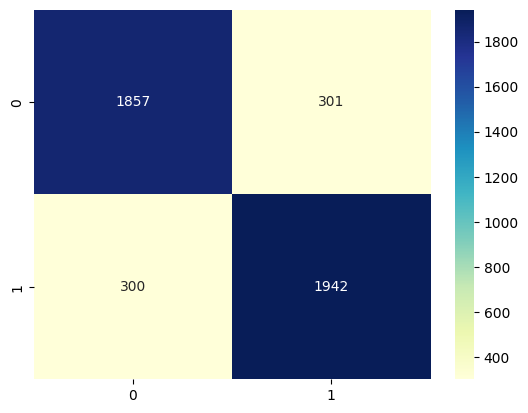

In [5]:

print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test,  y_pred_test)

cm_matrixNB = pd.DataFrame(data=cm
                        )
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()
